#📌 Extracão

In [166]:
import pandas as pd

In [167]:
dados = pd.read_json('/content/TelecomX_Data.json')

In [168]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [169]:
customer_normalized = pd.json_normalize(dados['customer'])
phone_normalized = pd.json_normalize(dados['phone'])
internet_normalized = pd.json_normalize(dados['internet'])
account_normalized = pd.json_normalize(dados['account'])


dados = pd.concat([
    dados.drop(columns=['customer', 'phone', 'internet', 'account']),
    customer_normalized,
    phone_normalized,
    internet_normalized,
    account_normalized
], axis=1)

In [170]:
print(dados.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [171]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [172]:
print(dados['Charges.Total'].isnull().sum())

0


In [173]:

print(dados.duplicated().sum())

0


In [174]:
dados['Charges.Total'] = pd.to_numeric(dados['Charges.Total'], errors='coerce')

In [175]:
dados['Charges.Total'] = dados['Charges.Total'].fillna(0)

In [176]:
dados['Contas_Diarias'] = dados['Charges.Monthly'] / 30

In [177]:
print(dados.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Contas_Diarias'],
      dtype='object')


In [178]:
mapa_nomes = {
    'customerID': 'ID_Cliente',
    'Churn': 'Churn',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servico_Telefonico',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Faturamento_Mensal',
    'Charges.Total': 'Faturamento_Total'
}


dados.rename(columns=mapa_nomes, inplace=True)

In [186]:

colunas_para_modificar = [
    'Parceiro', 'Dependentes', 'Servico_Telefonico', 'Multiplas_Linhas',
    'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Fatura_Digital', 'Churn'
]


for coluna in colunas_para_modificar:
    dados[coluna] = dados[coluna].replace(
        to_replace=['Yes', 'No', 'No internet service', 'No phone service'],
        value=[1, 0, 0, 0]
    )

In [187]:
import numpy as np

dados['Churn'].replace('', np.nan, inplace=True)


dados.dropna(subset=['Churn'], inplace=True)


dados['Churn'] = dados['Churn'].astype(int)


print(f"Valores únicos na coluna 'Churn' agora: {dados['Churn'].unique()}")
print(f"Tipo da coluna 'Churn' agora: {dados['Churn'].dtype}")

Valores únicos na coluna 'Churn' agora: [0 1]
Tipo da coluna 'Churn' agora: int64


/tmp/ipython-input-848679301.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Churn'].replace('', np.nan, inplace=True)


In [185]:
dados.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [182]:
dados.to_csv('dados_tratados.csv')

#📊 Carga e análise

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [188]:
dados.describe()

,Churn,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Fatura_Digital,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


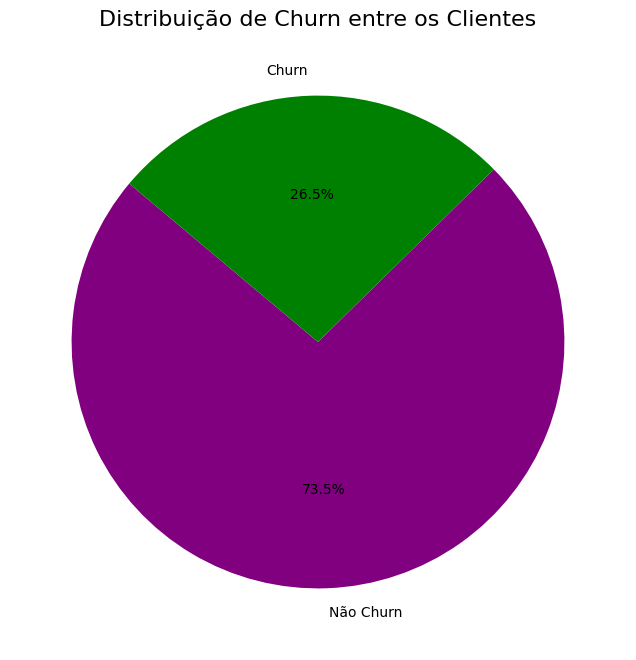

In [192]:
churn_counts = dados['Churn'].value_counts()
labels = churn_counts.index.map({0: 'Não Churn', 1: 'Churn'})

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['purple','green'])
plt.title('Distribuição de Churn entre os Clientes', fontsize=16)
plt.show()

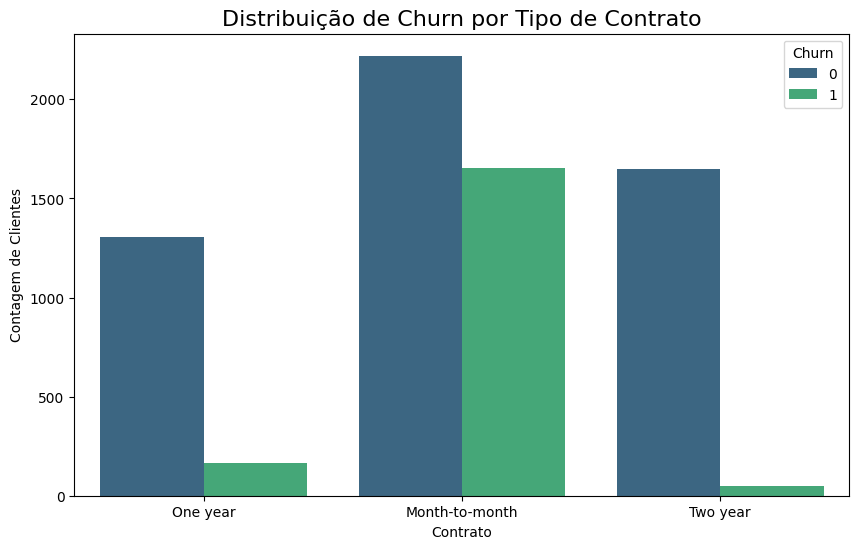

In [190]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='Contrato', hue='Churn', palette='viridis')
plt.title('Distribuição de Churn por Tipo de Contrato', fontsize=16)
plt.ylabel('Contagem de Clientes')
plt.xlabel('Contrato')
plt.show()

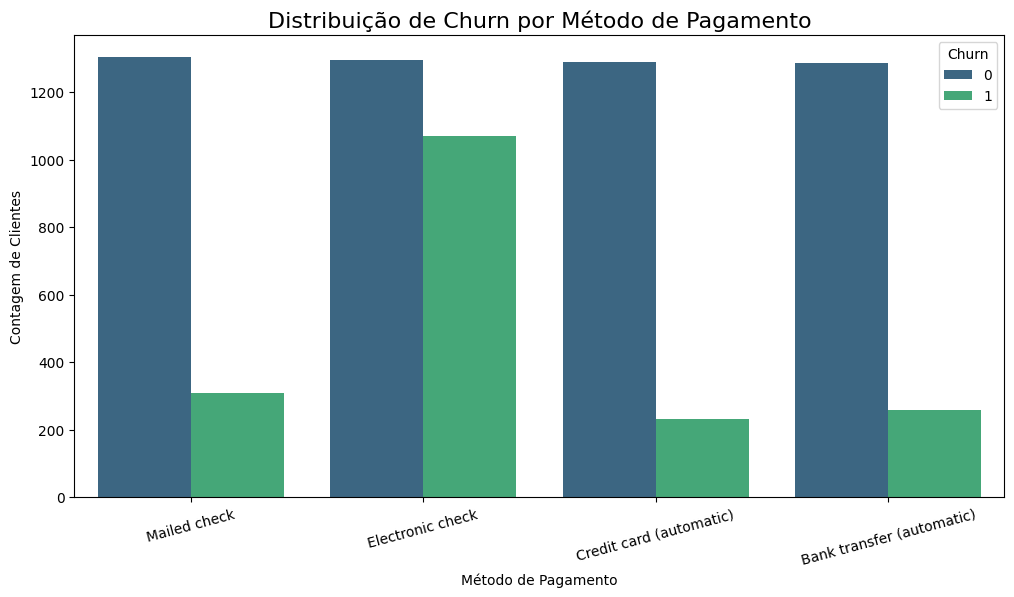

In [191]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados, x='Metodo_Pagamento', hue='Churn', palette='viridis')
plt.title('Distribuição de Churn por Método de Pagamento', fontsize=16)
plt.ylabel('Contagem de Clientes')
plt.xlabel('Método de Pagamento')
plt.xticks(rotation=15)
plt.show()

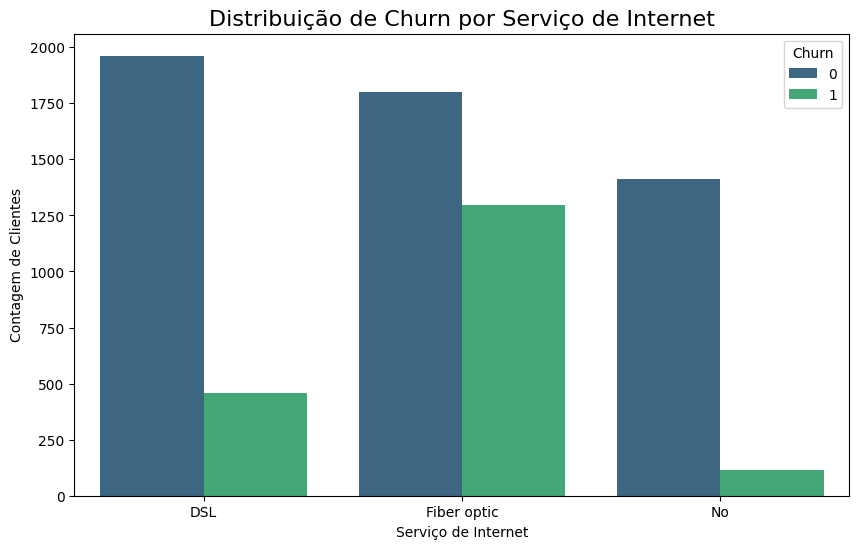

In [193]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='Servico_Internet', hue='Churn', palette='viridis')
plt.title('Distribuição de Churn por Serviço de Internet', fontsize=16)
plt.ylabel('Contagem de Clientes')
plt.xlabel('Serviço de Internet')
plt.show()

In [198]:
fig = px.box(dados,
             x='Churn',
             y='Meses_Contrato',
             color='Churn',
             title='Distribuição de Meses de Contrato por Churn',
             labels={'Churn': 'Churn (0 = Não, 1 = Sim)', 'Meses_Contrato': 'Meses de Contrato'})
fig.show()

In [199]:
fig = px.box(dados,
             x='Churn',
             y='Faturamento_Mensal',
             color='Churn',
             title='Distribuição de Faturamento Mensal por Churn',
             labels={'Churn': 'Churn (0 = Não, 1 = Sim)', 'Faturamento_Mensal': 'Faturamento Mensal'})
fig.show()

In [200]:
fig = px.box(dados,
             x='Churn',
             y='Faturamento_Total',
             color='Churn',
             title='Distribuição de Faturamento Total por Churn',
             labels={'Churn': 'Churn (0 = Não, 1 = Sim)', 'Faturamento_Total': 'Faturamento Total'})
fig.show()

#📄Relatorio Final

1. Introdução
Objetivo da Análise
O presente relatório detalha a análise realizada sobre a base de dados de clientes de uma empresa de telecomunicações. O objetivo principal é identificar os fatores que mais influenciam na decisão de um cliente cancelar seu serviço, um fenômeno conhecido como Churn. Compreender esses fatores é o primeiro passo para desenvolver estratégias eficazes de retenção e aumentar a satisfação do cliente.

O Problema de Negócio
A evasão de clientes (Churn) é uma das métricas mais críticas para empresas com modelo de assinatura. Adquirir um novo cliente pode custar até cinco vezes mais do que reter um cliente existente. Uma alta taxa de churn impacta diretamente a receita e a sustentabilidade do negócio. Portanto, analisar seus causadores e agir proativamente para mitigá-los é uma iniciativa de alto valor estratégico.

2. Limpeza e Tratamento de Dados
Para garantir a qualidade e a confiabilidade da análise, os dados brutos passaram por um rigoroso processo de limpeza e tratamento. As seguintes etapas foram executadas:

Carga e Normalização: Os dados, originalmente em um arquivo JSON com estruturas aninhadas, foram carregados. As colunas que continham dicionários de dados (customer, phone, internet, account) foram desmembradas e "achatadas", transformando cada chave em uma coluna separada.

Correção de Tipos de Dados: A coluna de faturamento total (Faturamento_Total) foi identificada como texto (object). Ela foi convertida para um formato numérico (float), tratando os valores que eram textos vazios.

Tratamento de Dados Ausentes: Foi identificado que a variável-alvo Churn continha tanto valores nulos (NaN) quanto textos vazios (''). Ambos foram tratados como dados ausentes e as linhas correspondentes foram removidas para não comprometer a análise e a futura modelagem.

Padronização: As colunas foram renomeadas para o português para facilitar a compreensão. Variáveis categóricas com respostas "Sim" e "Não" foram convertidas para o formato binário (1 e 0, respectivamente) para possibilitar cálculos estatísticos.

Criação de Novas Variáveis: A coluna Contas_Diarias foi criada a partir do faturamento mensal para oferecer uma nova perspectiva de análise.

Após este processo, obtivemos um conjunto de dados limpo, coeso e pronto para a análise.

3. Análise Exploratória de Dados
A análise dos dados limpos revelou padrões claros sobre o comportamento dos clientes que cancelam o serviço.

Taxa de Churn Geral: A taxa de evasão geral na base de dados é de 26.5%, indicando que mais de um a cada quatro clientes cancela o serviço.

Principais Fatores de Influência:

Tipo de Contrato: Clientes com contrato mensal (Month-to-month) representam a esmagadora maioria dos casos de churn. A flexibilidade desse tipo de contrato facilita o cancelamento, enquanto contratos mais longos (1 ou 2 anos) garantem uma maior retenção.

Meses de Contrato (Tempo de Vida): Há uma forte correlação negativa entre o tempo de vida do cliente e a probabilidade de churn. Clientes com poucos meses de contrato (tipicamente menos de 10) são muito mais propensos a cancelar.

Faturamento Mensal: Clientes com faturas mensais mais altas tendem a cancelar mais. Isso pode indicar uma percepção de baixo custo-benefício para os planos mais caros.

Método de Pagamento: O pagamento via cheque eletrônico (Electronic check) está associado a uma taxa de churn significativamente maior em comparação com cartões de crédito (automático) ou boletos.

Serviço de Internet: Clientes com serviço de Fibra Óptica (Fiber optic), apesar de ser um serviço premium, apresentam uma alta taxa de churn, o que se correlaciona com o maior faturamento mensal desses planos.

4. Conclusões e Insights
A análise dos dados nos permite traçar um perfil claro do cliente com alto risco de evasão e entender os fatores que contribuem para essa decisão.

O Perfil de Risco: O cliente mais propenso a cancelar é aquele que está há poucos meses na base, possui um contrato flexível (mensal) e paga um valor mensal relativamente alto (muitas vezes por um serviço de Fibra Óptica).

O Atrito Financeiro e Contratual: A combinação de um contrato sem fidelidade com um custo mensal elevado e um método de pagamento potencialmente problemático (cheque eletrônico) cria um cenário de alto risco para a evasão.

A Janela Crítica: Os primeiros meses de um cliente são o período mais crítico. Se o cliente não perceber o valor do serviço rapidamente, a chance de cancelamento é muito alta.

5. Recomendações Estratégicas
Com base nos insights gerados, as seguintes ações são recomendadas para reduzir a taxa de churn:

Foco na Retenção Inicial: Criar um programa de onboarding para novos clientes, garantindo que eles extraiam o máximo de valor do serviço nos primeiros 3 meses. Isso é especialmente importante para clientes de planos mais caros, como os de Fibra Óptica.

Incentivos para Contratos Longos: Desenvolver campanhas de marketing direcionadas a clientes com contrato mensal que já passaram do período crítico (ex: 6 meses) para migrarem para contratos de 1 ou 2 anos, oferecendo pequenos descontos ou benefícios adicionais.

Revisão do Custo-Benefício: Para os planos com faturas mais altas, considerar a inclusão de serviços de valor agregado (como segurança online, suporte técnico premium) para justificar o preço e aumentar a percepção de valor.

Otimização dos Métodos de Pagamento: Investigar o processo de pagamento com cheque eletrônico para identificar possíveis pontos de atrito ou falhas. Ao mesmo tempo, incentivar ativamente a migração para métodos de pagamento automáticos (como débito automático em cartão de crédito), que estão associados a taxas de churn muito menores.
